In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('train.csv', header = 0)

In [4]:
dev = pd.read_csv('dev.csv', header = 0)

In [5]:
# load the data into dataframes
train_X = data.loc[:, data.columns != 'label']
train_y = pd.DataFrame(data['label'])

In [6]:
val_X = dev.loc[:, data.columns != 'label']
val_y = pd.DataFrame(dev['label'])

In [7]:
train_X['text length'] = train_X['review'].apply(len)
train_X['word length'] = train_X['review'].apply(lambda x: len(x.split(" "))) 

val_X['text length'] = val_X['review'].apply(len)
val_X['word length'] = val_X['review'].apply(lambda x: len(x.split(" "))) 

In [8]:
train_X[0:5]

,ex_id,user_id,prod_id,rating,date,review,text length,word length
0,0,923,0,3.0,2014-12-08,The food at snack is a selection of popular Gr...,215,40
1,1,924,0,3.0,2013-05-16,This little place in Soho is wonderful. I had ...,269,52
2,2,925,0,4.0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,178,32
3,3,926,0,4.0,2011-07-28,This is a beautiful quaint little restaurant o...,491,90
4,4,927,0,4.0,2010-11-01,Snack is great place for a casual sit down lu...,596,102


In [9]:
#Functions for cleaning HTML tags and punctuation 
import re
def clean_html(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def clean_punc(word):
    cleaned = re.sub(r'[?|!|\'|#]', r'', word)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    return cleaned

In [10]:
#Getting Stopwords 
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stop = stopwords.words('english') # list of stop words
sno = SnowballStemmer('english') # object with methods to get root words
print (stop)
print('***************************************')
print(sno.stem('tastful'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haha_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',

In [11]:
final_string = []
s = ''
for sentence in train_X['review'].values:
    filtered_sentence = []
    sentence = clean_html(sentence)
    for word in sentence.split():
        for cleaned_word in clean_punc(word).split():
            if (cleaned_word.isalpha() and (len(cleaned_word) > 2) and cleaned_word not in stop):
                s = (sno.stem(cleaned_word.lower())).encode('utf8')
                filtered_sentence.append(s)
            else:
                continue
                 
    strl = b' '.join(filtered_sentence)
    final_string.append(strl)

train_X['cleaned review'] = final_string

In [12]:
train_X['review'][5]

"A solid 4 stars for this greek food spot. \xa0If you're a fan of lamb like I am, you must come here and try the lamb sandwich. \xa0Amazingly tender and juicy with onions and arugula. \xa0Also had a good greek salad."

In [13]:
train_X['cleaned review'][5]
# The b denotes a byte string.

b'solid star greek food spot your fan lamb like must come tri lamb sandwich amaz tender juici onion arugula also good greek salad'

# upsampling fake review cases

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
# ros random over sampler
ros = RandomOverSampler()
train_X_ros, train_y_ros = ros.fit_sample(train_X, train_y)

In [16]:
print('pre-upsampling genuine cases: ',train_y[train_y['label'] == 0].shape[0])
print('post-upsampling genuine cases: ',train_y_ros[train_y_ros['label'] == 0].shape[0])
print('pre-upsampling fake cases: ',train_y[train_y['label'] == 1].shape[0])
print('post-upsampling fake cases: ',train_y_ros[train_y_ros['label'] == 1].shape[0])

pre-upsampling genuine cases:  225055
post-upsampling genuine cases:  225055
pre-upsampling fake cases:  25819
post-upsampling fake cases:  225055


In [17]:
train_X_ros.head()

,ex_id,user_id,prod_id,rating,date,review,text length,word length,cleaned review
0,0,923,0,3.0,2014-12-08,The food at snack is a selection of popular Gr...,215,40,b'the food snack select popular greek dish the...
1,1,924,0,3.0,2013-05-16,This little place in Soho is wonderful. I had ...,269,52,b'this littl place soho wonder lamb sandwich g...
2,2,925,0,4.0,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,178,32,b'order lunch snack last friday time noth miss...
3,3,926,0,4.0,2011-07-28,This is a beautiful quaint little restaurant o...,491,90,b'this beauti quaint littl restaur pretti stre...
4,4,927,0,4.0,2010-11-01,Snack is great place for a casual sit down lu...,596,102,b'snack great place casual sit especi cold win...


# bag of words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#BoW_data = count_vect.fit_transform(train_X['cleaned review'].values)

In [19]:
BoW_mod = count_vect.fit(train_X_ros['cleaned review'])

In [152]:
BoW_train_X = BoW_mod.transform(train_X_ros['cleaned review'])

In [21]:
val_final_string = []
s = ''
for sentence in val_X['review'].values:
    filtered_sentence = []
    sentence = clean_html(sentence)
    for word in sentence.split():
        for cleaned_word in clean_punc(word).split():
            if (cleaned_word.isalpha() and (len(cleaned_word) > 2) and cleaned_word not in stop):
                s = (sno.stem(cleaned_word.lower())).encode('utf8')
                filtered_sentence.append(s)
            else:
                continue
                 
    strl = b' '.join(filtered_sentence)
    val_final_string.append(strl)

val_X['cleaned review'] = val_final_string

In [153]:
BoW_val_X = BoW_mod.transform(val_X['cleaned review'])

In [80]:
import numpy as np
from scipy.sparse import hstack

In [154]:
train_extra = np.array(train_X_ros[['text length','word length','rating']])
train_extra_min = train_extra.min(axis = 0)
train_extra_max = train_extra.max(axis = 0)
train_extra = (train_extra - train_extra_min)/(train_extra_max-train_extra_min)

In [155]:
BoW_train_X = hstack((BoW_train_X, train_extra))

In [156]:
val_extra = np.array(val_X[['text length','word length','rating']])
val_extra_min = val_extra.min(axis = 0)
val_extra_max = val_extra.max(axis = 0)
val_extra = (val_extra - val_extra_min)/(val_extra_max-val_extra_min)

In [157]:
BoW_val_X = hstack((BoW_val_X, val_extra))

# Naive Bayes

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import naive_bayes
from sklearn.metrics import roc_curve, auc

In [159]:
nb_bernoulli = naive_bayes.BernoulliNB()

In [160]:
train_y_ros_arr = np.array(train_y_ros['label'])

In [161]:
nb_bernoulli.fit(BoW_train_X,train_y_ros_arr)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [162]:
preds_nb = nb_bernoulli.predict_proba(BoW_val_X)[:,1]

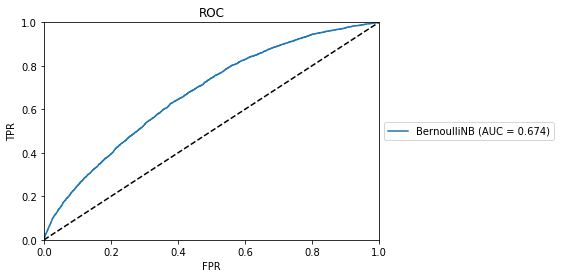

In [163]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

nb_fpr, nb_tpr, nb_thresholds = roc_curve(val_y, preds_nb)
nb_roc_auc = auc(nb_fpr, nb_tpr)
nb_curve = plt.plot(nb_fpr, nb_tpr, label = 'BernoulliNB' + ' (AUC = %0.3f)' % nb_roc_auc)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [164]:
pred_y = nb_bernoulli.predict(BoW_val_X)

In [165]:
val_y_arr = np.array(val_y['label'])

In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
confusion_matrix(val_y_arr, pred_y)

array([[16544, 15726],
       [  983,  2665]], dtype=int64)

# Logistic Reg

In [168]:
from sklearn.linear_model import LogisticRegression

In [179]:
lambda_set = np.arange(1,10.05,0.05)
#lambda_set = [-5,-4,-3,-2,-1,0]
result_dict = {}
for i in lambda_set:
    C_input = 1/i
    clf = LogisticRegression(C = C_input, max_iter = 2000)
    clf.fit(BoW_train_X, train_y_ros_arr)
    preds = clf.predict_proba(BoW_val_X)[:,1]
    fpr, tpr, thresholds = roc_curve(val_y, preds)
    roc_auc = auc(fpr, tpr)

    result_dict[i] = [clf, preds, roc_auc]
    
for i in result_dict:
    print(i, result_dict[i][2])

1.0 0.6865408335100223
1.05 0.6870830479126232
1.1 0.6875838933015838
1.1500000000000001 0.6880814087822594
1.2000000000000002 0.688537062558783
1.2500000000000002 0.6890029439107531
1.3000000000000003 0.6894036711899053
1.3500000000000003 0.6898233500644235
1.4000000000000004 0.6902159989181197
1.4500000000000004 0.690584234107503
1.5000000000000004 0.6909467099147
1.5500000000000005 0.6912995272889382
1.6000000000000005 0.6916230635563965
1.6500000000000006 0.6919317596458608
1.7000000000000006 0.6922794972110319
1.7500000000000007 0.6925782545436258
1.8000000000000007 0.6928838330914053
1.8500000000000008 0.6931673764807897
1.9000000000000008 0.6934399617536248
1.9500000000000008 0.693698777176129
2.000000000000001 0.6939832889572086
2.0500000000000007 0.6941996480490815
2.100000000000001 0.6944795302382855
2.1500000000000012 0.6947021498975203
2.200000000000001 0.6949253726778987
2.250000000000001 0.695170486207384
2.300000000000001 0.6953863695980732
2.3500000000000014 0.695610017

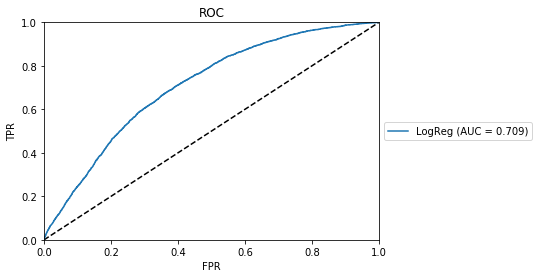

In [180]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

fpr, tpr, nb_thresholds = roc_curve(val_y, result_dict[10.000000000000007][1])
curve = plt.plot(fpr, tpr, label = 'LogReg' + ' (AUC = %0.3f)' % result_dict[10.000000000000007][2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [187]:
for i in lambda_set:
    print(i)
    print(result_dict[i][2])
    lr_pred_y = result_dict[i][0].predict(BoW_val_X)
    print(confusion_matrix(val_y_arr, lr_pred_y))
    print('---')

1.0
0.6865408335100223
[[21105 11165]
 [ 1369  2279]]
---
1.05
0.6870830479126232
[[21105 11165]
 [ 1363  2285]]
---
1.1
0.6875838933015838
[[21099 11171]
 [ 1363  2285]]
---
1.1500000000000001
0.6880814087822594
[[21095 11175]
 [ 1361  2287]]
---
1.2000000000000002
0.688537062558783
[[21086 11184]
 [ 1356  2292]]
---
1.2500000000000002
0.6890029439107531
[[21084 11186]
 [ 1352  2296]]
---
1.3000000000000003
0.6894036711899053
[[21075 11195]
 [ 1348  2300]]
---
1.3500000000000003
0.6898233500644235
[[21059 11211]
 [ 1347  2301]]
---
1.4000000000000004
0.6902159989181197
[[21050 11220]
 [ 1346  2302]]
---
1.4500000000000004
0.690584234107503
[[21047 11223]
 [ 1345  2303]]
---
1.5000000000000004
0.6909467099147
[[21042 11228]
 [ 1344  2304]]
---
1.5500000000000005
0.6912995272889382
[[21022 11248]
 [ 1342  2306]]
---
1.6000000000000005
0.6916230635563965
[[21024 11246]
 [ 1342  2306]]
---
1.6500000000000006
0.6919317596458608
[[21014 11256]
 [ 1339  2309]]
---
1.7000000000000006
0.692279

[[20678 11592]
 [ 1209  2439]]
---
6.750000000000005
0.7055974908801287
[[20678 11592]
 [ 1209  2439]]
---
6.800000000000005
0.7056472950951131
[[20673 11597]
 [ 1210  2438]]
---
6.850000000000005
0.7057298547344499
[[20670 11600]
 [ 1210  2438]]
---
6.900000000000006
0.7057786310950913
[[20670 11600]
 [ 1210  2438]]
---
6.9500000000000055
0.7058404382702962
[[20669 11601]
 [ 1210  2438]]
---
7.000000000000005
0.7059151658294326
[[20668 11602]
 [ 1210  2438]]
---
7.050000000000005
0.7059748068653194
[[20666 11604]
 [ 1209  2439]]
---
7.100000000000005
0.7060340486519988
[[20661 11609]
 [ 1209  2439]]
---
7.150000000000006
0.706089034612018
[[20663 11607]
 [ 1208  2440]]
---
7.2000000000000055
0.7061362989224689
[[20660 11610]
 [ 1207  2441]]
---
7.250000000000005
0.7061809383817461
[[20654 11616]
 [ 1207  2441]]
---
7.300000000000006
0.7062652309325373
[[20655 11615]
 [ 1204  2444]]
---
7.350000000000006
0.7063186198957263
[[20656 11614]
 [ 1203  2445]]
---
7.400000000000006
0.70637353